<a href="https://colab.research.google.com/github/qfx4yk/ds1002-qfx4yk/blob/main/labs/lab1/lab1-ftx-stock-pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [42]:
# Name: Aparna Gana                  Computing ID: qfx4yk

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
ftx = pd.read_csv("ftx-2021-01-01--2023-12-31.csv")

## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [5]:
ftx.shape

# rows = 741; columns = 1

(741, 1)

In [6]:
### Comment ###
# This raw data contains data on 11 different variables:
# timeOpen, timeClose, timeHigh, timeLow, open, high, low, close, volume, marketCap, and timestamp.
# However, all these categories are merged into a single column and need to first be split apart before data analysis.

## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [7]:
# Split single column into multiple columns
ftx[['timeOpen','timeClose','timeHigh','timeLow','open','high','low','close','volume','marketCap','timestamp']] = ftx['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'].str.split(';', expand=True)

In [8]:
# Delete unnecessary columns
ftx = ftx.drop(['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'], axis=1)
ftx_new = ftx.drop(['timeOpen','timeClose','timeHigh','timeLow','marketCap'], axis=1)

In [9]:
# Basic information about ftx_new
ftx_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   open       741 non-null    object
 1   high       741 non-null    object
 2   low        741 non-null    object
 3   close      741 non-null    object
 4   volume     741 non-null    object
 5   timestamp  741 non-null    object
dtypes: object(6)
memory usage: 34.9+ KB


In [10]:
# Data types in ftx_new
ftx_new.dtypes

open         object
high         object
low          object
close        object
volume       object
timestamp    object
dtype: object

In [11]:
# Columns, shape, length, number of duplicates, and number of missing values in ftx_new
print("Columns:", ftx_new.columns)
print("Shape:", ftx_new.shape)
print("Length:", len(ftx_new))
print("Number of duplicates:", ftx_new.duplicated().sum())
print("Number of missing values:", ftx_new.isna().sum().sum())

Columns: Index(['open', 'high', 'low', 'close', 'volume', 'timestamp'], dtype='object')
Shape: (741, 6)
Length: 741
Number of duplicates: 14
Number of missing values: 0


In [12]:
# Removing duplicate rows from ftx_new
ftx_new = ftx_new.drop_duplicates()
print("Length of ftx_new with duplicates removed:", len(ftx_new))

Length of ftx_new with duplicates removed: 727


In [13]:
ftx_new.shape

(727, 6)

In [14]:
# Sort values by ascending timestamp value
ftx_new = ftx_new.sort_values(["timestamp"], ascending=True)

Now display the first 10 rows of the cleaned dataset.

In [16]:
ftx_new.head(10)

,open,high,low,close,volume,timestamp
739,6.20113267,7.00752345,6.171834,6.92396831,31046652.87,"""2021-01-03T23:59:59.999Z"""
738,6.94867983,7.63214646,6.35821845,7.51407925,40526109.15,"""2021-01-04T23:59:59.999Z"""
737,7.52821638,8.71494656,7.08112034,8.66468773,49479278.39,"""2021-01-05T23:59:59.999Z"""
736,8.67128533,9.39079731,8.4259458,9.39079731,31404627.93,"""2021-01-06T23:59:59.999Z"""
735,9.386493,10.00487172,9.21524402,9.56213089,46303336.73,"""2021-01-07T23:59:59.999Z"""
734,9.56923877,9.72642922,8.45226488,9.38098835,42286267.89,"""2021-01-08T23:59:59.999Z"""
733,9.37044999,9.63612025,8.72804429,9.57051061,28498948.68,"""2021-01-09T23:59:59.999Z"""
732,9.57191738,9.94479719,8.6571467,9.30880934,31012393.14,"""2021-01-10T23:59:59.999Z"""
731,9.2983155,9.2983155,7.12604974,8.61099653,101302369.57,"""2021-01-11T23:59:59.999Z"""
730,8.6151428,9.09747943,8.04091578,8.38113312,26745357.03,"""2021-01-12T23:59:59.999Z"""


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [17]:
# Ensure Python reads closing prices as "floats", not "objects" so that computation can be done
ftx_new['close'] = ftx_new['close'].astype('float')

In [43]:
# Add new column ['close_change']
ftx_new['close_change'] = ftx_new['close'].diff()
ftx_new

,open,high,low,close,volume,timestamp,close_change,rate_of_change,absolute_value_rate_of_change
739,6.20113267,7.00752345,6.171834,6.923968,31046652.87,"""2021-01-03T23:59:59.999Z""",NaN,NaN,NaN
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,"""2021-01-04T23:59:59.999Z""",0.590111,NaN,NaN
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,"""2021-01-05T23:59:59.999Z""",1.150608,0.949817,0.949817
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,"""2021-01-06T23:59:59.999Z""",0.726110,-0.368934,0.368934
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,"""2021-01-07T23:59:59.999Z""",0.171334,-0.764039,0.764039
...,...,...,...,...,...,...,...,...,...
4,0.9311378574,0.9554017418,0.9164143458,0.923668,4574953.05,"""2022-12-27T23:59:59.999Z""",-0.007028,-1.195015,1.195015
3,0.9211619958,0.9257015248,0.8698420242,0.886091,4192949.85,"""2022-12-28T23:59:59.999Z""",-0.037577,4.346593,4.346593
2,0.8857226476,0.8871175386,0.8430286751,0.860231,3766979.57,"""2022-12-29T23:59:59.999Z""",-0.025860,-0.311817,0.311817
1,0.860193073,0.864751879,0.8266428992,0.839048,3608615.07,"""2022-12-30T23:59:59.999Z""",-0.021183,-0.180850,0.180850


## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [48]:
# Identify top 10 days of positive growth for FTX thru sorting values by close_change
ftx_new_close_change_sorted = ftx_new.sort_values(["close_change"], ascending=False)
ftx_new_close_change_sorted[['timestamp','close_change']].head(10)

,timestamp,close_change
492,"""2021-09-01T23:59:59.999Z""",16.677156
487,"""2021-09-06T23:59:59.999Z""",9.800320
692,"""2021-02-19T23:59:59.999Z""",8.335900
592,"""2021-05-24T23:59:59.999Z""",6.333923
673,"""2021-03-09T23:59:59.999Z""",5.529699
515,"""2021-08-09T23:59:59.999Z""",5.325192
485,"""2021-09-08T23:59:59.999Z""",5.239728
625,"""2021-04-26T23:59:59.999Z""",4.504385
611,"""2021-05-05T23:59:59.999Z""",4.488174
311,"""2022-02-28T23:59:59.999Z""",4.401841


## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [46]:
# Add new column ['rate_of_change']
ftx_new['rate_of_change'] = ftx_new['close_change'].pct_change()
ftx_new

,open,high,low,close,volume,timestamp,close_change,rate_of_change,absolute_value_rate_of_change
739,6.20113267,7.00752345,6.171834,6.923968,31046652.87,"""2021-01-03T23:59:59.999Z""",NaN,NaN,NaN
738,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,"""2021-01-04T23:59:59.999Z""",0.590111,NaN,NaN
737,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,"""2021-01-05T23:59:59.999Z""",1.150608,0.949817,0.949817
736,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,"""2021-01-06T23:59:59.999Z""",0.726110,-0.368934,0.368934
735,9.386493,10.00487172,9.21524402,9.562131,46303336.73,"""2021-01-07T23:59:59.999Z""",0.171334,-0.764039,0.764039
...,...,...,...,...,...,...,...,...,...
4,0.9311378574,0.9554017418,0.9164143458,0.923668,4574953.05,"""2022-12-27T23:59:59.999Z""",-0.007028,-1.195015,1.195015
3,0.9211619958,0.9257015248,0.8698420242,0.886091,4192949.85,"""2022-12-28T23:59:59.999Z""",-0.037577,4.346593,4.346593
2,0.8857226476,0.8871175386,0.8430286751,0.860231,3766979.57,"""2022-12-29T23:59:59.999Z""",-0.025860,-0.311817,0.311817
1,0.860193073,0.864751879,0.8266428992,0.839048,3608615.07,"""2022-12-30T23:59:59.999Z""",-0.021183,-0.180850,0.180850


## 7. Identify Greatest % Change Days (1 pt)

Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

In [49]:
# Identify the top 5 days of greatest rate changes thru sorting values by the absolute value of rate_of_change
ftx_new['absolute_value_rate_of_change'] = ftx_new['rate_of_change'].abs() # create new column of the absolute value of rate_of_change
ftx_new_abs_value_rate_of_change_sorted = ftx_new.sort_values(["absolute_value_rate_of_change"], ascending=False)
ftx_new_abs_value_rate_of_change_sorted[['timestamp','rate_of_change']].head(5)

,timestamp,rate_of_change
372,"""2021-12-28T23:59:59.999Z""",612.326740
443,"""2021-10-18T23:59:59.999Z""",-262.744729
190,"""2022-06-28T23:59:59.999Z""",-164.238246
55,"""2022-11-08T23:59:59.999Z""",129.835551
236,"""2022-05-13T23:59:59.999Z""",117.908853


## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

<Axes: xlabel='Day (Jan 2021-Dec 2022)', ylabel='Closing Price'>

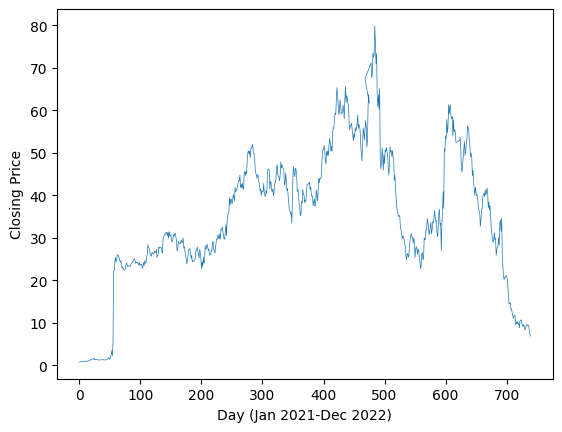

In [61]:
# Daily closing price plot
ftx_new['close'].plot(xlabel='Day (Jan 2021-Dec 2022)', ylabel='Closing Price', linewidth=0.5)

<Axes: xlabel='Day (Jan 2021-Dec 2022)', ylabel='Daily Gain/Loss'>

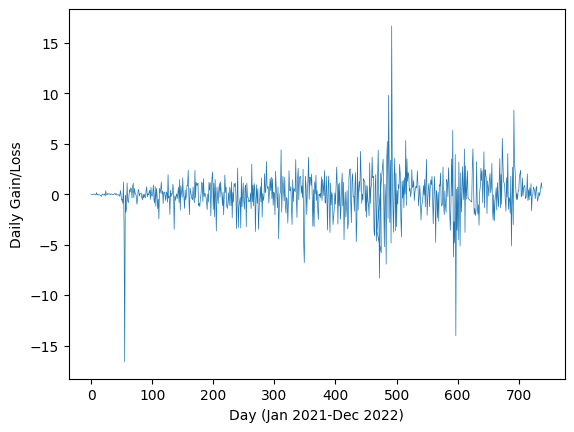

In [62]:
# Daily gains/losses plot
ftx_new['close_change'].plot(xlabel='Day (Jan 2021-Dec 2022)', ylabel='Daily Gain/Loss', linewidth=0.5)

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

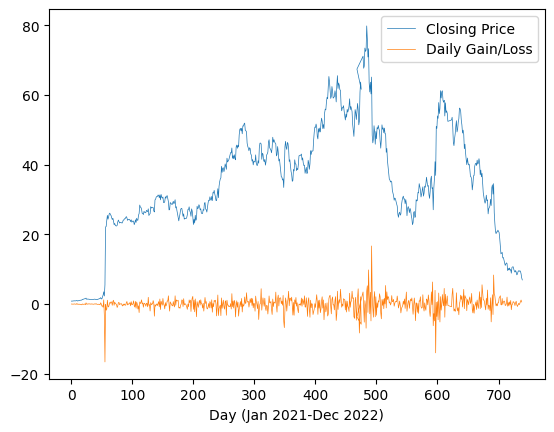

In [64]:
# Daily closing price and daily gains/losses combined plot
ftx_new[['close', 'close_change']].plot(xlabel='Day (Jan 2021-Dec 2022)', linewidth=0.5)
plt.legend(['Closing Price', 'Daily Gain/Loss'])